In [1]:
# add matplotlib inline command
%matplotlib inline
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Files to load
city_data_to_load = 'resources/city_data.csv'
ride_data_to_load = 'resources/ride_data.csv'

In [3]:
#read the city data file and store it in a pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#read the ride data file and store it in a pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Get the cols and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
#get data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
#get unique values of the type of city
cityTypes = city_data_df['type'].unique()
cityTypes

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
#get the number of data points from the city Types
typePoints = {}
for option in cityTypes:
    typePoints[option] = sum(city_data_df['type']==option)
typePoints

{'Urban': 66, 'Suburban': 36, 'Rural': 18}

In [13]:
#combine data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on=['city','city'] )

#display dataframe
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Chart for Ride-Sharing Data

In [22]:
#create city types data frame
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [24]:
#get the number of rides for each city
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [25]:
# Get average fare for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [26]:
# Get the average number of drivers for each city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

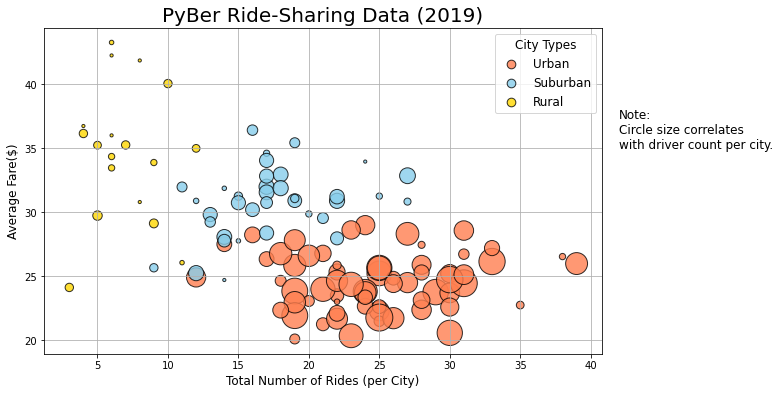

In [57]:
#building the scatter plots
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color='coral', edgecolor = 'black', lw = 1, alpha=.8, label='Urban')
ax.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color='skyblue', edgecolor = 'black', lw = 1, alpha=.8, label='Suburban')
ax.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color='gold', edgecolor = 'black', lw = 1, alpha=.8, label='Rural')
ax.set_title('PyBer Ride-Sharing Data (2019)', fontsize=20)
ax.set_ylabel('Average Fare($)', fontsize=12)
ax.set_xlabel('Total Number of Rides (per City)', fontsize=12)
ax.grid()
#adding legend
lgnd = ax.legend(fontsize = 12, mode = 'Expanded', scatterpoints = 1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
#incorporate text label about circle size
ax.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize=12)
#save the figure
plt.savefig('analysis/Fig1.png')
plt.show()